In [1]:
import numpy as np
import scipy as sc
import scipy.linalg as la

import matplotlib.pyplot as plt

# Factorizando la matriz de van der Monde

## Apartado 1

Define una función que
 - Recibe como argumentos:
     - Una lista `xs` de nodos con `n` elementos $x_1,\dots,x_n$.
     - Un entero `k` menor que `n`
 - Devuelve un array `V` de dimensiones $n\times k$
$$
{\displaystyle V={
\begin{bmatrix}
1&x _{1}&x _{1}^{2}&\dots &x _{1}^{k-1}\\
1&x _{2}&x _{2}^{2}&\dots &x _{2}^{k-1}\\
\vdots &\vdots &\vdots &\ddots &\vdots \\
1&x _{n}&x _{n}^{2}&\dots &x _{n}^{k-1}
\end{bmatrix}}.}
$$

In [2]:
def vdm(xs, k):
    '''Matriz de van der Monde dada una lista de puntos xi
    
    crea una matriz NxN cuyo elemento M[i,j] es xi^j
    
    xs: lista de puntos
    k: el grado del polinomio interpolador es k-1
    
    Devuelve un array Nxk
    '''
    N = len(xs)
    M = np.zeros((N, k))
    for i in range(N):
        for j in range(k):
            M[i,j] = xs[i]**j
    return M

In [3]:
#Otra versión más rápida (vectorizada)

def vdm2(xs,k):
    '''Matriz de van der Monde dada una lista de puntos xi
    
    crea una matriz NxN cuyo elemento M[i,j] es xi^j
    
    xs: lista de puntos
    k: el grado del polinomio interpolador es k-1
    
    Devuelve un array Nxk
    '''
    N = len(xs)
    M = np.zeros((N, k))
    for j in range(k):
        M[:,j] = xs**j
    return M

In [4]:
#Otra versión todavía más rápida (doblemente vectorizada)
#Además, cuando consigues escribir código de esta forma,
# es muy fácil correr el código en una GPU usando pytorch
# o tensorflow

def vdm3(xs,k):
    '''Matriz de van der Monde dada una lista de puntos xi
    
    crea una matriz NxN cuyo elemento M[i,j] es xi^j
    
    xs: lista de puntos
    k: el grado del polinomio interpolador es k-1
    
    Devuelve un array Nxk
    '''
    #Es necesario hacer reshape para añadir un eje nuevo, y obtener
    #una matriz cuadrada xi**j en vez de un vector xi**i
    return xs.reshape((-1,1))**np.arange(k)

In [5]:
xs = np.array([-1,0,1,2,3])
print(vdm(xs,3))
print(vdm2(xs,3))
print(vdm3(xs,3))

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]]
[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]]
[[ 1 -1  1]
 [ 1  0  0]
 [ 1  1  1]
 [ 1  2  4]
 [ 1  3  9]]


In [6]:
xs = np.arange(100)
%timeit vdm(xs, 30)
%timeit vdm2(xs, 30)
%timeit vdm3(xs, 30)

1.12 ms ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
47.4 µs ± 1.52 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
12.9 µs ± 395 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Apartado 2
La matriz $V$ está relacionada con el polinomio interpolador y con el polinomio aproximador.

En particular, los coeficientes del polinomio aproximador son la solución de
$$
\left(V^T\cdot V\right)\cdot \mathbf{a} = V^T\cdot \mathbf{y},
$$

Se pide:
 - Discuta qué factorizaciones admiten las matrices $V$ y $V^T\cdot V$, que puedan ser de ayuda para calcular polinomios interpoladores o aproximadores.
 - Calcule estas factorizaciones para una lista de puntos `[1,2 ... n]`, donde `n` es un entero.

> - __La matriz V sólo es cuadrada cuando el grado del polinomio es igual al número de puntos menos 1. En este caso, hemos visto en clase de teoría que la matriz V es invertible siempre que los números $x_j$ sean todos distintos. Como V no es simétrica ni banda, sólo podemos aplicar una factorización V=PLU (o PV=LU, que es casi lo mismo), cuando V es cuadrada.__

In [7]:
n = 5
xs = np.linspace(1,n,n)
V = vdm3(xs,len(xs))
print(V)
la.lu(V)

[[  1.   1.   1.   1.   1.]
 [  1.   2.   4.   8.  16.]
 [  1.   3.   9.  27.  81.]
 [  1.   4.  16.  64. 256.]
 [  1.   5.  25. 125. 625.]]


(array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]]), array([[ 1.  ,  0.  ,  0.  ,  0.  ,  0.  ],
        [ 1.  ,  1.  ,  0.  ,  0.  ,  0.  ],
        [ 1.  ,  0.5 ,  1.  ,  0.  ,  0.  ],
        [ 1.  ,  0.75,  0.75,  1.  ,  0.  ],
        [ 1.  ,  0.25,  0.75, -1.  ,  1.  ]]), array([[   1.,    1.,    1.,    1.,    1.],
        [   0.,    4.,   24.,  124.,  624.],
        [   0.,    0.,   -4.,  -36., -232.],
        [   0.,    0.,    0.,   -3.,  -39.],
        [   0.,    0.,    0.,    0.,   -6.]]))

> - __El método `lu` también permite factorizar matrices que no son cuadradas, aunque no lo hemos estudiado en clase...__

In [8]:
n = 5
k = 3
xs = np.linspace(1,n,n)
V = vdm3(xs,k)
print(V)
la.lu(V)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]]


(array([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]]), array([[1.  , 0.  , 0.  ],
        [1.  , 1.  , 0.  ],
        [1.  , 0.5 , 1.  ],
        [1.  , 0.75, 0.75],
        [1.  , 0.25, 0.75]]), array([[ 1.,  1.,  1.],
        [ 0.,  4., 24.],
        [ 0.,  0., -4.]]))

> - __La matriz $V^T\cdot V$ es simétrica y definida positiva, así que admite una factorización de Cholesky.__
> - __Comprobamos que hemos obtenido una matriz $L$ tal que $L^T\cdot L=V^T\cdot V$, salvo error numérico (observamos que $L^T\cdot L=V^T\cdot V$, a pesar de que $L$ y $V$ tienen distintas dimensiones).__

In [9]:
k = 3
V = vdm3(xs,k)
VTV = V.T@V
print(VTV)
L = la.cholesky(VTV)
print(L.T@L)
print(VTV - L.T@L)

[[  5.  15.  55.]
 [ 15.  55. 225.]
 [ 55. 225. 979.]]
[[  5.  15.  55.]
 [ 15.  55. 225.]
 [ 55. 225. 979.]]
[[-8.8817842e-16  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]


## Apartado 3

Utilice las factorizaciones del apartado anterior para encontrar los polinomios aproximadores de grados 2 y 4 con la siguiente serie de datos:

```
xs = [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]
ys = [ 0.071,  0.458,  0.908,  1.344,  1.641,  1.934,  1.451,  1.571,
        1.282,  0.446,  0.261, -0.183, -0.372, -0.162, -0.181, -0.12 ,
       -0.545, -0.114,  0.505,  0.474]
```

> - __Utilizamos la factorización de Cholesky__
$$
V^T\cdot V\cdot \mathbf{a} =L^T\cdot L\cdot \mathbf{a} = V^T\cdot \mathbf{y}
$$
> __Ahora es suficiente con resolver dos sistemas de ecuaciones con matriz de coeficientes triangular:__
$$
L^T\cdot \mathbf{z} = V^T\cdot \mathbf{y}
$$
$$
L\cdot \mathbf{a} = \mathbf{z}
$$


In [28]:
n = 20
xs = np.linspace(1,n,n)
ys = np.array(
    [ 0.071,  0.458,  0.908,  1.344,  1.641,  1.934,  1.451,  1.571,
      1.282,  0.446,  0.261, -0.183, -0.372, -0.162, -0.181, -0.12 ,
      -0.545, -0.114,  0.505,  0.474])

Text(0.5, 1.0, 'Polinomio aproximador')

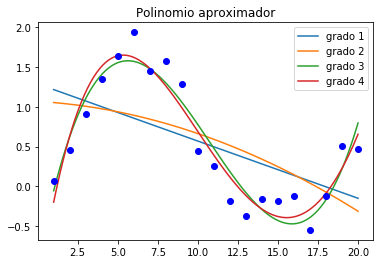

In [37]:
for k in (1,2,3,4):
    #para ajustar un polinomio de grado k, llamamos a la función
    # vdm con argumento k+1
    V = vdm3(xs,k+1)
    VTV = V.T@V
    L = la.cholesky(VTV)
    z = la.solve_triangular(L.T, V.T@ys, lower=True)
    a = la.solve_triangular(L, z, lower=False)

    x_eval = np.linspace(1,n,200)
    # a[::-1] es el array a, pero recorrido en sentido inverso
    #  (hay otras formas de dar la vuelta a un array, 
    #   por ejemplo con un bucle for)
    y_eval = np.polyval(a[::-1], x_eval)

    plt.plot(x_eval, y_eval, label='grado %s'%k)

plt.plot(xs, ys, 'bo')
plt.legend()
plt.title('Polinomio aproximador')

> - Comparamos el resultado con el obtenido con ``polyfit``

Text(0.5, 1.0, 'Polinomio aproximador')

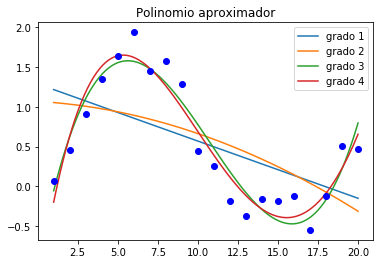

In [36]:
for k in (1,2,3,4):
    
    cs = np.polyfit(xs, ys, k)
    x_eval = np.linspace(1,n,200)
    y_eval = np.polyval(cs, x_eval)

    plt.plot(x_eval, y_eval, label='grado %s'%k)

plt.plot(xs, ys, 'bo')
plt.legend()
plt.title('Polinomio aproximador')